# Gradient Boosting Classification

The Gradient Boosting (GB) algorithm trains a series of weak learners and each focuses on the errors the previous learners have made and tries to improve it. Together, they make a better prediction.

According to Wikipedia, Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion as other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

Prerequisite

    1. Linear regression and gradient descent
    2. Decision Tree
    3. Gradient Boosting Regression

After studying this post, you will be able to:

    1. Explain gradient boosting algorithm.
    2. Explain gradient boosting classification algorithm.
    3. Write a gradient boosting classification from scratch


    
# The algorithm

The following plot illustrates the algorithm.

![Gradient Boosting Regression](gradient_boosting/gradient_boosting_classification.png)

(Picture taken from Youtube channel StatQuest)

From the plot above, the first part is a stump, which is the log of odds of **y**. We then add several trees to it. In the following trees, the target is not y. Instead, the target is the residual or the true value subtracts the previous prediction.

$$residual=true\_value - previous\_prediction$$

That is why we say in Gradient Boosting trains a series of weak learners, each focuses on the errors of the previous one. The residual predictions are multiplied by the learning rate (0.1 here) before added to the average.

Here the picture looks more complicated than the one on regression. The purple ones are log of odds (**l**). The green ones are probabilities. We firstly calculate log of odds of **y**, instead of average. We then calculate probabilities using log of odds. We build a regression tree. The leaves are colored green. The leaves have residuals. We use the probability residuals to produce log-of-odds residuals or $\gamma$. $\gamma$ is then used to update **l**. This continues until we are satisfied with the results or we are running out of iterations.



---

**The Steps**

Step 1: Calculate the log of odds of y. This is also the first estimation of y. Here $n_1$ is the number of true values and $n_0$ of false values.
$$l_0(x)=\log \frac{n_1}{n_0}$$
For each $x_i$, the probability is:
$$p_{0i}=\frac{e^{l_{0i}}}{1+e^{l_{0i}}} $$
The prediction is:
$$
f_{0i}=\begin{cases}
0 & p_{0i}<0.5 \\
1 & p_{0i}>=0.5
\end{cases}
$$

Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=f_i-p_i$$
  * Step 2.2: Fit a regression tree $t_m(x)$ to pseudo-residuals and create terminal regions (leaves) $R_{jm}$ for $j=1...Jm$ <br />

  * Step 2.3: For each leaf of the tree, there are $p_j$ elements, compute $\gamma$ as following equation. <br />

$$\gamma_{im}=\frac{\sum r_{im}}{\sum (1-r_{im-1})(r_{im-1})} $$

  * (In practise, the regression tree will do this for us.)

  * Step 2.4: Update the log of odds with learning rate $\alpha$:
$$l_m(x)=l_{m-1}+\alpha \gamma_m$$

For each $x_i$, the probability is:
$$p_{mi}=\frac{e^{l_{mi}}}{1+e^{l_{mi}}} $$
The prediction is:
$$
f_{mi}=\begin{cases}
0 & p_{mi}<0.5 \\
1 & p_{mi}>=0.5
\end{cases}
$$


Step 3. Output $$f_M(x)$$

---

# (Optional) From Gradient Boosting to Gradient Boosting Regression

The above knowledge is enough for writing BGR code from scratch. But I want to explain more about gradient boosting. GB is a meta-algorithm that can be applied to both regression and classification. The above one is only a specific form for regression. In the following, I will introduce the general gradient boosting algorithm and deduce GBR from GB.

Let's first look at the GB steps

---

**The Steps**

Input: training set $\{(x_i, y_i)\}_{i=1}^{n}$, a differentiable loss function $L(y, F(x))$, number of iterations M

Algorithm:

Step 1: Initialize model with a constant value:

$$F_0(x)=\underset{\gamma}{\operatorname{argmin}}\sum_{i=1}^{n}L(y_i, \gamma)$$

Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=-[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}], {F(x)=F_{m-1}(x)}$$
  * Step 2.2: Fit a weak learner $h_m(x)$ to pseudo-residuals. and create terminal regions $R_{jm}$, for $j=1...J_m$<br />

  * Step 2.3: For each leaf of the tree, compute $\gamma$ as the following equation. Here $\hat{r}$ is the predicted residual produced by $h_m(x)$.<br />
$$\gamma_{jm}=\underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{jm}}^{n}L(y_i, F_{m-1}(x_i)+\gamma)$$

  * Step 2.4: Update the model with learning rate $\alpha$:
$$F_m(x)=F_{m-1}+\alpha\gamma_m$$


Step 3. Output $$F_M(x)$$

Lost Function:

To deduce the GB to GBC, I simply define a loss function and solve the loss function in step 1, 2.1 and 2.3. We use Log of Likelihood as the loss function:

$$L(y, F(x))=-\sum_{i=1}^{N}(y_i* log(p) + (1-y_i)*log(1-p))$$

Since this is a function of probability and we need a function of log of odds($l$), let's focus on the middle part and transform it into a function of $l$.

The middle part is:

$$
-(y*\log(p)+(1-y)*\log(1-p)) \\
=-y * \log(p) - (1-y) * \log(1-p) \\
=-y\log(p)-\log(1-p)+y\log(1-p) \\
=-y(\log(p)-\log(1-p))-\log(1-p) \\
=-y(\log(\frac{p}{1-p}))-\log(1-p) \\
=-y \log(odds)-\log(1-p)
$$

Since

$$
\log(1-p)=log(1-\frac{e^{log(odds)}}{1+e^{log(odds)}}) \\
=\log(\frac{1+e^l}{1+e^l}-\frac{e^l}{1+e^l})\\
=\log(\frac{1}{1+e^l}) \\
=\log(1)+\log(1+e^l) \\
=-log(1+e^{\log(odds)})
$$

We put this to the previous equation:
$$
-(y*\log(p)+(1-y)*\log(1-p)) \\
=-y\log(odds)+\log(1+e^{\log(odds)}) \\
$$
Thus, we will have the loss function over log of odds:

$$L=-\sum_{i=1}^{N}(y\log(odds)-\log(1+e^{\log(odds)}))$$



For Step 1:

Because The lost function is convex and at the lowest point where the derivative is zero, we have the following:

$$
\frac{\partial L(y, F_0)}{\partial F_0}  \\
=-\frac{\partial \sum_{i=1}^{N}(y\log(odds)-\log(1+e^{\log(odds)}))}{\partial log(odds)} \\
=-\sum_{i=1}^{n} y_i+\sum_{i=1}^{N} \frac{\partial log(1+e^{log(odds)})}{\partial log(odds)} \\
=-\sum_{i=1}^{n} y_i+\sum_{i=1}^{N} \frac{1}{1+e^{\log(odds)}} \frac{\partial (1+e^l)}{\partial l} \\
=-\sum_{i=1}^{n} y_i+\sum_{i=1}^{N} \frac{1}{1+e^{\log(odds)}} \frac{\partial (e^l)}{\partial l} \\
=-\sum_{i=1}^{n} y_i+\sum_{i=1}^{N} \frac{e^l}{1+e^l} \\
=-\sum_{i=1}^{n} y_i+N\frac{e^l}{1+e^l}=0
$$

And We have: (Here p is the real probability)


$$
\frac{e^l}{1+e^l}=\frac{\sum_{i=1}^{N}y_i}{N}=p \\
e^l=p+p*e^l \\
(1-p)e^l=p \\
e^l=\frac{p}{1-p} \\
\log(odds)=log(\frac{p}{1-p})
$$

Such that, when log(odds)=log(p/(1-p)) or the probability is the real probability, the lost function is minimized. 

For Step 2.1

$$r_{im}=-[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x)=F_{m-1}(x)}$$

$$=-[\frac{\partial (-(y_i* log(p)+(1-y_i)*log(1-p)))}{\partial F_{m-1}(x_i)}]_{F(x)=F_{m-1}(x)}$$

We have already taken the derivative.

$$=y_i-F_{m-1}(x_i)$$

For step 2.3:

$$\gamma_{jm}=\underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{jm}}^{n}L(y_i, F_{m-1}(x_i)+\gamma)$$

I apply the lost function:

$$
\gamma_{jm} \\
=\underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{jm}}^{n}L(y_i, F_{m-1}(x_i)+\gamma) \\
=\underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{jm}}^{n} (-y_i * (F_{m-1}+\gamma)+\log(1+e^{F_{m-1}+\gamma})) \\
$$
Let's focus on the middle part

$$-y_i * (F_{m-1}+\gamma)+\log(1+e^{F_{m-1}+\gamma})$$

Let's use Second Order Taylor Polynomial:

$$L(y,F+\gamma) \approx L(y, F)+ \frac{d L(y, F+\gamma)\gamma}{d F}+\frac{1}{2} \frac{d^2 L(y, F+\gamma)\gamma^2}{d^2 F}$$

Let's take the derivate:

$$
\because \frac{d L(y, F+\gamma)}{d\gamma} \approx \frac{d L(y, F)}{d F}+\frac{d^2 L(y, F)\gamma}{d^2 F}=0 \\
\therefore \frac{d L(y, F)}{d F}+\frac{d^2 L(y, F)\gamma}{d^2 F}=0 \\
\therefore \gamma=-\frac{\frac{d L(y, F)}{d F}}{\frac{d^2 L(y, F)}{d^2 F}} \\
\therefore \gamma = \frac{y-p}{\frac{d^2 (-y * l + \log(1+e^l))}{d^2 l}} \\
\therefore \gamma = \frac{y-p}{\frac{d (-y + \frac{e^l}{1+e^l})}{d l}} \\
\therefore \gamma = \frac{y-p}{\frac{d \frac{e^l}{1+e^l}}{d l}} \\
$$
(The product rule (ab)'=a' b+a b'​)

$$
\therefore \gamma=\frac{y-p}{\frac{d e^l}{dl} * \frac{1}{1+e^l} - e^l * \frac{d }{d l} \frac{1}{1+e^l}} \\
=\frac{y-p}{\frac{e^l}{1+e^l}-e^l * \frac{1}{(1+e^l)^2} \frac{d}{dl} (1+e^l)} \\
=\frac{y-p}{\frac{e^l}{1+e^l}- \frac{(e^l)^2}{(1+e^l)^2}} \\
=\frac{y-p}{e^l+(e^l)^2-+(e^l)^2} \\
=\frac{y-p}{\frac{e^l}{(1+e^l)^2}} \\
=\frac{y-p}{p(1-p)}
$$


Now we have

$$\gamma = \frac{\sum (y-p)}{\sum p(1-p)}$$

# Code

In [291]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


import graphviz 
from sklearn import tree

In [280]:
df=pd.DataFrame()
df['name']=['Alex','Brunei','Candy','David','Eric','Felicity']
df['likes_popcorn']=[1,1,0,1,0,0]
df['age']=[10,90,30,30,30,10]
df['favorite_color']=['Blue','Green','Blue','Red','Green','Blue']
df['loves_troll2']=[1,1,0,0,1,1]
print('Data:')
display(df)

X=df[['likes_popcorn','age']].copy()
X['blue']=0
X.loc[df['favorite_color']=='Blue','blue']=1
X['green']=0
X.loc[df['favorite_color']=='Green','blue']=1
X['red']=0
X.loc[df['favorite_color']=='Red','blue']=1

y=df['loves_troll2']
print('X:')
display(X)

n=df.shape[0]

Data:


,name,likes_popcorn,age,favorite_color,loves_troll2
0,Alex,1,10,Blue,1
1,Brunei,1,90,Green,1
2,Candy,0,30,Blue,0
3,David,1,30,Red,0
4,Eric,0,30,Green,1
5,Felicity,0,10,Blue,1


X:


,likes_popcorn,age,blue,green,red
0,1,10,1,0,0
1,1,90,1,0,0
2,0,30,1,0,0
3,1,30,1,0,0
4,0,30,1,0,0
5,0,10,1,0,0


## Step 1 Log of Odds, Probabilities and Predictions

In [292]:
log_of_odds0=np.log(4 / 2)
probability0=np.exp(log_of_odds0)/(np.exp(log_of_odds0)+1)
print(f'the log_of_odds is : {log_of_odds0}')
print(f'the probability is : {probability0}')
predict0=1
print(f'the prediction is : 1')
n_samples=6

loss0=-(y*np.log(probability0)+(1-y)*np.log(1-probability0))

the log_of_odds is : 0.6931471805599453
the probability is : 0.6666666666666666
the prediction is : 1


In [293]:
#now let's get started
n_times = 5
learning_rate=0.8
log_of_odds=np.zeros([n_times+1,n_samples])

residuals = np.zeros([n_times+1,n_samples])
loss = [0] * (n_times+1)
probabilities = np.zeros([n_times+1,n_samples])
predictions = np.zeros([n_times+1,n_samples])
score = np.zeros([n_times+1])
#calculation
log_of_odds[0] = [log_of_odds0] * n_samples
probabilities[0] = [probability0] * n_samples
predictions[0] = (probabilities[0]>0.5)*1.0
score[0]=np.sum(predictions[0]==y) / n_samples
residuals[0] = y - probabilities[0]
loss[0] = loss0.sum()
trees = []
gamma_value = np.zeros([n_times+1,8])
gamma = np.zeros([n_times+1,n_samples])

In [294]:
residuals.shape

(6, 6)

In [295]:
probabilities.shape

(6, 6)

In [298]:
def iteration(i):
    #step 2.1 calculate the residuals
    residuals[i] = y - probabilities[i]
    #step 2.2 Fit a regression tree
    dt = DecisionTreeRegressor(max_depth=1, max_leaf_nodes=3)
    dt=dt.fit(X, residuals[i])
    
    trees.append(dt.tree_)
    
    #Step 2.3 Calculate gamma
    leaf_indeces=dt.apply(X)
    print(leaf_indeces)
    unique_leaves=np.unique(leaf_indeces)
    n_leaf=len(unique_leaves)
    #for leaf 1
    for ileaf in range(n_leaf):
        
        leaf_index=unique_leaves[ileaf]
        n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
        previous_probability = probabilities[i][leaf_indeces==leaf_index]
        denominator = np.sum(previous_probability * (1-previous_probability))
        igamma = dt.tree_.value[ileaf+1][0][0] * n_leaf / denominator
        gamma_value[i][ileaf]=igamma
        print(f'for leaf {leaf_index}, we have {n_leaf} related samples. and gamma is {igamma}')

    gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
    #Step 2.4 Update F(x) 
    log_of_odds[i+1] = log_of_odds[i] + learning_rate * gamma[i]

    probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    predictions[i+1] = (probabilities[i+1]>0.5)*1.0
    score[i+1]=np.sum(predictions[i+1]==y) / n_samples
    #residuals[i+1] = y - probabilities[i+1]
    loss[i+1]=np.sum(-y * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))
    
    new_df=df.copy()
    new_df.columns=['name', 'popcorn','age','color','y']
    new_df[f'$p_{i}$']=probabilities[i]
    new_df[f'$l_{i}$']=log_of_odds[i]
    new_df[f'$r_{i}$']=residuals[i]
    new_df[f'$\gamma_{i}$']=gamma[i]
    new_df[f'$l_{i+1}$']=log_of_odds[i+1]
    new_df[f'$p_{i+1}$']=probabilities[i+1]
    display(new_df)
    
    dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,feature_names=X.columns) 
    graph = graphviz.Source(dot_data) 
    display(graph)

[1 2 2 2 2 1]
for leaf 1, we have 2 related samples. and gamma is 1.5
for leaf 2, we have 4 related samples. and gamma is -0.7499999999999998


,name,popcorn,age,color,y,$p_0$,$l_0$,$r_0$,$\gamma_0$,$l_1$,$p_1$
0,Alex,1,10,Blue,1,0.666667,0.693147,0.333333,1.50,1.893147,0.869114
1,Brunei,1,90,Green,1,0.666667,0.693147,0.333333,-0.75,0.093147,0.523270
2,Candy,0,30,Blue,0,0.666667,0.693147,-0.666667,-0.75,0.093147,0.523270
3,David,1,30,Red,0,0.666667,0.693147,-0.666667,-0.75,0.093147,0.523270
4,Eric,0,30,Green,1,0.666667,0.693147,0.333333,-0.75,0.093147,0.523270
5,Felicity,0,10,Blue,1,0.666667,0.693147,0.333333,1.50,1.893147,0.869114


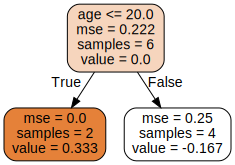

In [299]:
iteration(0)

In Iteration 0, Let's look at each step.

In Step 2.1, We calculate residuals, that is $y-p_0$. 

In step 2.2, we fit a regression tree as above.

In step 2.3, we calculate $\gamma$. 

  * For the first leaf, we have two samples (Alex and Felicity). $\gamma$ is:

In [300]:
(1/3+1/3)/((1-2/3)*2/3+(1-2/3)*2/3)

1.4999999999999998

  * For the second leaf, we have four samples. $\gamma$ is:

In [301]:
(1/3-2/3-2/3+1/3)/(4*(1-2/3)*2/3)

-0.75

In Step 2.4, F(x) is updated.

[1 2 1 1 1 1]
for leaf 1, we have 5 related samples. and gamma is -0.31564962030401844
for leaf 2, we have 1 related samples. and gamma is 1.9110594001952543


,name,popcorn,age,color,y,$p_1$,$l_1$,$r_1$,$\gamma_1$,$l_2$,$p_2$
0,Alex,1,10,Blue,1,0.869114,1.893147,0.130886,-0.315650,1.640627,0.837620
1,Brunei,1,90,Green,1,0.523270,0.093147,0.476730,1.911059,1.621995,0.835070
2,Candy,0,30,Blue,0,0.523270,0.093147,-0.523270,-0.315650,-0.159373,0.460241
3,David,1,30,Red,0,0.523270,0.093147,-0.523270,-0.315650,-0.159373,0.460241
4,Eric,0,30,Green,1,0.523270,0.093147,0.476730,-0.315650,-0.159373,0.460241
5,Felicity,0,10,Blue,1,0.869114,1.893147,0.130886,-0.315650,1.640627,0.837620


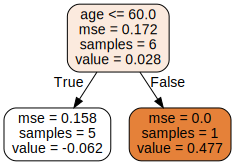

In [302]:
iteration(1)
    

For Iteration 2, we have two leaves. <br />
For Leaf 1, there are 5 samples. And $\gamma$ is


In [303]:
sum_of_residual=0.130886+-0.523270+-0.523270+0.476730+0.130886
denominator=2*0.869114*(1-0.869114)+3*0.523270*(1-0.523270)
display(sum_of_residual/denominator)

-0.3156498224562022

For Leaf 2, there is only 1 sample. And $\gamma$ is

In [304]:
0.476730/(0.523270*(1-0.523270))

1.9110593001700842

[1 2 2 2 2 1]
for leaf 1, we have 2 related samples. and gamma is 1.1938583610371274
for leaf 2, we have 4 related samples. and gamma is -0.24439014590890917


,name,popcorn,age,color,y,$p_2$,$l_2$,$r_2$,$\gamma_2$,$l_3$,$p_3$
0,Alex,1,10,Blue,1,0.837620,1.640627,0.162380,1.193858,2.595714,0.930585
1,Brunei,1,90,Green,1,0.835070,1.621995,0.164930,-0.244390,1.426483,0.806353
2,Candy,0,30,Blue,0,0.460241,-0.159373,-0.460241,-0.244390,-0.354885,0.412198
3,David,1,30,Red,0,0.460241,-0.159373,-0.460241,-0.244390,-0.354885,0.412198
4,Eric,0,30,Green,1,0.460241,-0.159373,0.539759,-0.244390,-0.354885,0.412198
5,Felicity,0,10,Blue,1,0.837620,1.640627,0.162380,1.193858,2.595714,0.930585


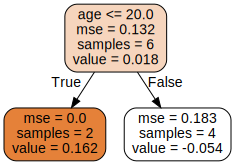

In [305]:
iteration(2)

[1 2 1 1 1 1]
for leaf 1, we have 5 related samples. and gamma is -0.11420357619360062
for leaf 2, we have 1 related samples. and gamma is 1.2401521534064346


,name,popcorn,age,color,y,$p_3$,$l_3$,$r_3$,$\gamma_3$,$l_4$,$p_4$
0,Alex,1,10,Blue,1,0.930585,2.595714,0.069415,-0.114204,2.504351,0.924446
1,Brunei,1,90,Green,1,0.806353,1.426483,0.193647,1.240152,2.418604,0.918235
2,Candy,0,30,Blue,0,0.412198,-0.354885,-0.412198,-0.114204,-0.446247,0.390253
3,David,1,30,Red,0,0.412198,-0.354885,-0.412198,-0.114204,-0.446247,0.390253
4,Eric,0,30,Green,1,0.412198,-0.354885,0.587802,-0.114204,-0.446247,0.390253
5,Felicity,0,10,Blue,1,0.930585,2.595714,0.069415,-0.114204,2.504351,0.924446


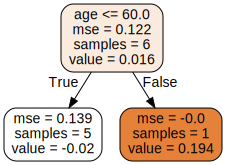

In [306]:
iteration(3)

[2 2 1 2 1 1]
for leaf 1, we have 3 related samples. and gamma is 0.5406201302738854
for leaf 2, we have 3 related samples. and gamma is -0.6083743125192569


,name,popcorn,age,color,y,$p_4$,$l_4$,$r_4$,$\gamma_4$,$l_5$,$p_5$
0,Alex,1,10,Blue,1,0.924446,2.504351,0.075554,-0.608374,2.017652,0.882638
1,Brunei,1,90,Green,1,0.918235,2.418604,0.081765,-0.608374,1.931905,0.873460
2,Candy,0,30,Blue,0,0.390253,-0.446247,-0.390253,0.540620,-0.013751,0.496562
3,David,1,30,Red,0,0.390253,-0.446247,-0.390253,-0.608374,-0.932947,0.282327
4,Eric,0,30,Green,1,0.390253,-0.446247,0.609747,0.540620,-0.013751,0.496562
5,Felicity,0,10,Blue,1,0.924446,2.504351,0.075554,0.540620,2.936847,0.949638


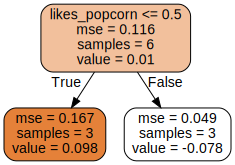

In [307]:
iteration(4)

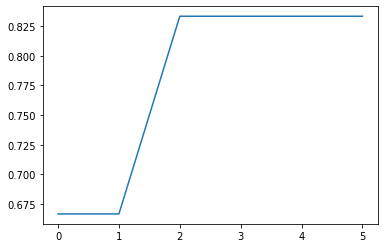

In [308]:
plt.plot(score)
plt.show()

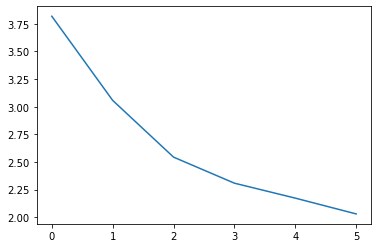

In [309]:
plt.plot(loss)
plt.show()

# Example 2
## Load data

In [264]:
cancer=load_breast_cancer()
n_samples = len(cancer.target)
X = cancer.data
y = cancer.target
total=len(y)
has_cancer=np.sum(y)
no_cancer=total-has_cancer
print(f'{has_cancer} out of {total} persons have cancer')
print(f'features {X.shape[1]}')

357 out of 569 persons have cancer
features 30


## Step 1 Log of Odds

In [265]:
log_of_odds0=np.log(has_cancer / no_cancer)
probability0=np.exp(log_of_odds0)/(np.exp(log_of_odds0)+1)
print(f'the log_of_odds is : {log_of_odds0}')
print(f'the probability is : {probability0}')
predict0=1

the log_of_odds is : 0.5211495071076265
the probability is : 0.6274165202108963


## Step 2 For Loop

In [266]:
#explore
residuals0=y - probability0
loss0=-(y*np.log(probability0)+(1-y)*np.log(1-probability0))
print(f'loss is {loss0.sum()}')
loss0=-y * log_of_odds0 + np.log(1+np.exp(log_of_odds0))
print(f'loss is {loss0.sum()}')

tree0 = DecisionTreeRegressor(max_depth=1)
tree0.fit(X, residuals0)
stem = tree0.tree_

leaf_index=tree0.apply(X)
#for leaf 1
n_leaf1=len(leaf_index[leaf_index==1])
previous_probability1 = np.array([probability0] * n_leaf1)
denominator1 = np.sum(previous_probability1 * (1-previous_probability1))
gamma1 = stem.value[1][0][0] * n_leaf1 / denominator1
print(f'gamma1 {gamma1}')
#for leaf 2
n_leaf2=len(leaf_index[leaf_index==2])
previous_probability2 = np.array([probability0] * n_leaf2)
denominator2 = np.sum(previous_probability2 * (1-previous_probability2))
gamma2 = stem.value[2][0][0] * n_leaf2 / denominator2
print(f'gamma2 {gamma2}')

gamma_value=[gamma1, gamma2]
gamma = np.array([gamma_value[index-1] for index in leaf_index])
new_log_of_odds = log_of_odds0 + 0.1 * gamma
new_loss=-y * new_log_of_odds + np.log(1+np.exp(new_log_of_odds))
print(f'new loss is {new_loss.sum()}')

loss is 375.7200026920845
loss is 375.72000269208445
gamma1 1.2213642015774735
gamma2 -2.4363001705150817
new loss is 338.13703383104206


In [267]:
#now let's get started
n_times = 20
learning_rate=0.1
log_of_odds=np.zeros([n_times+1,n_samples])

residuals = np.zeros([n_times+1,n_samples])
loss = [0] * (n_times+1)
probabilities = np.zeros([n_times+1,n_samples])
score = np.zeros([n_times+1])
#calculation
log_of_odds[0] = [log_of_odds0] * n_samples
probabilities[0] = [probability0] * n_samples
score[0]=np.sum((probabilities[0]>0.5)*1.0==y) / n_samples
residuals[0] = y - probabilities[0]
loss[0] = loss0.sum()
trees = []
gamma_value = np.zeros([n_times+1,8])
gamma = np.zeros([n_times+1,n_samples])

In [268]:
for i in range(n_times):
    dt = DecisionTreeRegressor(max_depth=2)
    dt=dt.fit(X, residuals[i])
    tree = dt.tree_
    trees.append(tree)
    leaf_indeces=dt.apply(X)
    unique_leaves=np.unique(leaf_indeces)
    n_leaf=len(unique_leaves)
    #for leaf 1
    for ileaf in range(n_leaf):
        leaf_index=unique_leaves[ileaf]
        n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
        previous_probability = probabilities[i][leaf_indeces==leaf_index]
        denominator = np.sum(previous_probability * (1-previous_probability))
        igamma = tree.value[ileaf+1][0][0] * n_leaf / denominator
        gamma_value[i][ileaf]=igamma

    gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
    #next 
    log_of_odds[i+1] = log_of_odds[i] + learning_rate * gamma[i]

    probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    score[i+1]=np.sum((probabilities[i+1]>0.5)*1.0==y) / n_samples
    residuals[i+1] = y - probabilities[i+1]
    loss[i+1]=np.sum(-y * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))

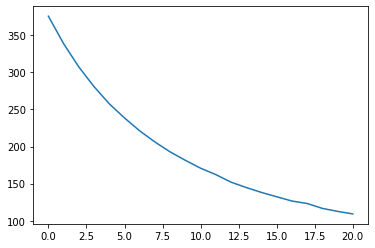

In [269]:
plt.plot(loss)
plt.show()

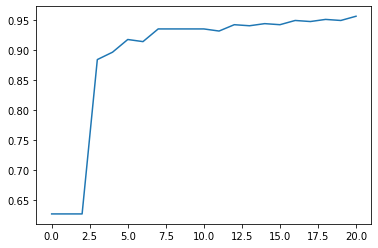

In [270]:
plt.plot(score)
plt.show()

# Reference

[Gradient Boosting (Wikipedia)](https://en.wikipedia.org/wiki/Gradient_boosting)

[Gradient Boost Part 3: Classification -- Youtube StatQuest](https://www.youtube.com/watch?v=jxuNLH5dXCs)

[Gradient Boost Part 4: Classification Details -- Youtube StatQuest](https://www.youtube.com/watch?v=StWY5QWMXCw)

[sklearn.tree.DecisionTreeRegressor -- scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[Understanding the decision tree structure -- scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)